In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [10]:
df['date_x'] = pd.to_datetime(df['date_x']) # converted date column to datetime bcoz it was in object type

In [16]:
df.isnull().sum() # checking for total null values in data

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [14]:
df['genre'] = df['genre'].fillna('unavailable') # filled null values with  unavailable in genre column

In [17]:
df['crew'] = df['crew'].fillna('unavailable')   # filled null values with  unavailable in crew column

In [18]:
df.describe()

,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


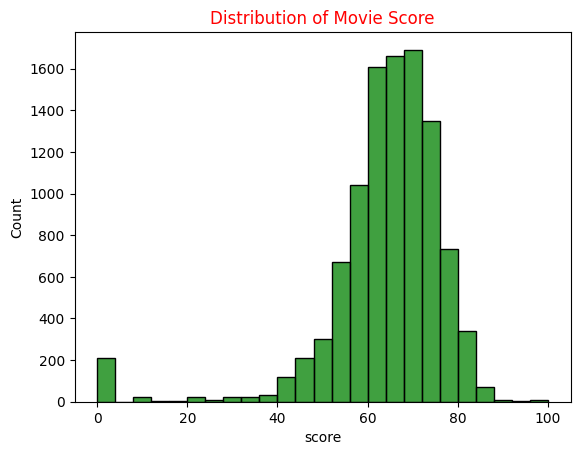

In [42]:
# What is the distribution of movie scores? Plot a histogram and describe its shape.
sns.histplot(x = 'score', data = df, bins = 25, color = "green")
plt.title("Distribution of Movie Score", color = 'r',)
plt.show()

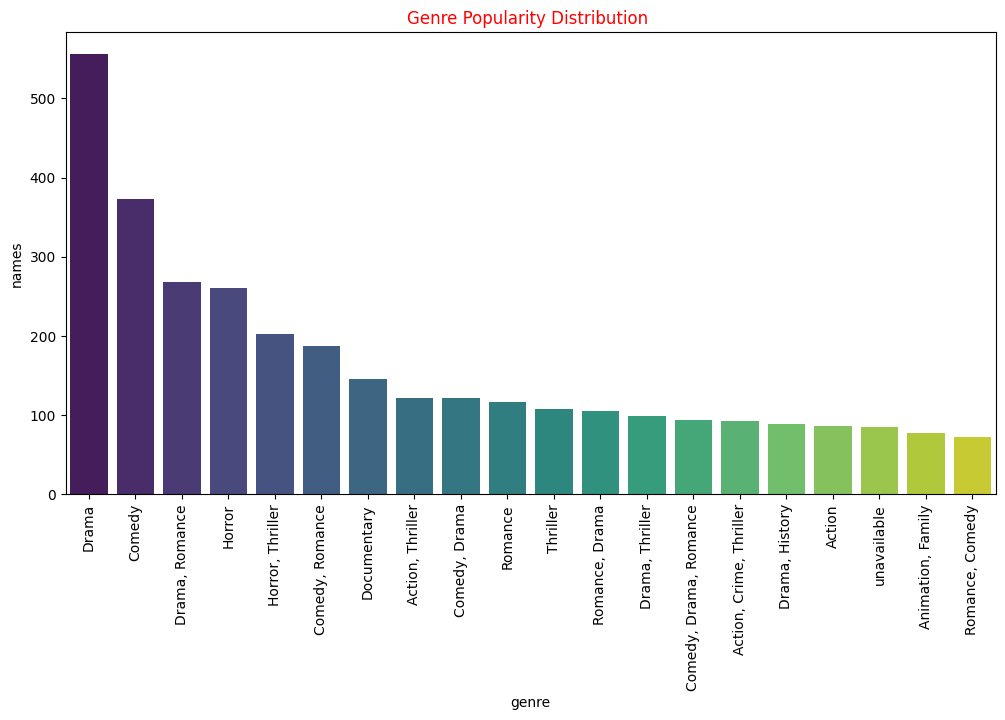

In [29]:
# What are the most common genres in the dataset? Use a bar chart to show their distribution.
gb = df.groupby('genre').agg({"names":"count"})
gb = gb.sort_values(by = "names", ascending = False)
gb = gb.head(20)
gb
plt.figure(figsize =(12,6))
sns.barplot(x = gb.index, y = gb['names'], data = gb, hue = gb.index, palette = 'viridis')
plt.title("Genre Popularity Distribution ",color = "r")
plt.xticks(rotation = 90)
plt.show()

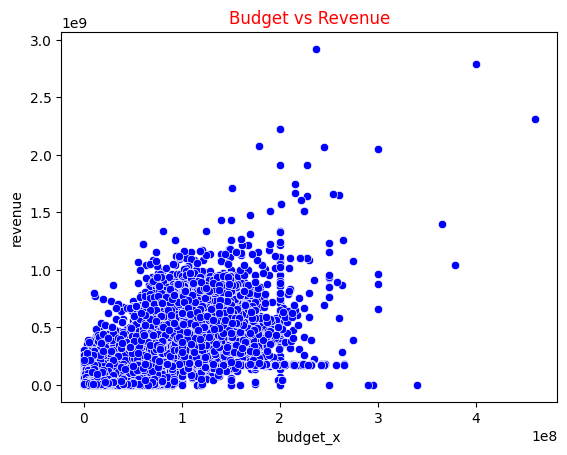

In [49]:
# reletionship between a budget and its revenue
plt.title("Budget vs Revenue",color= "r")
sns.scatterplot(x = df['budget_x'], y = df['revenue'], color = 'b' )
plt.show()

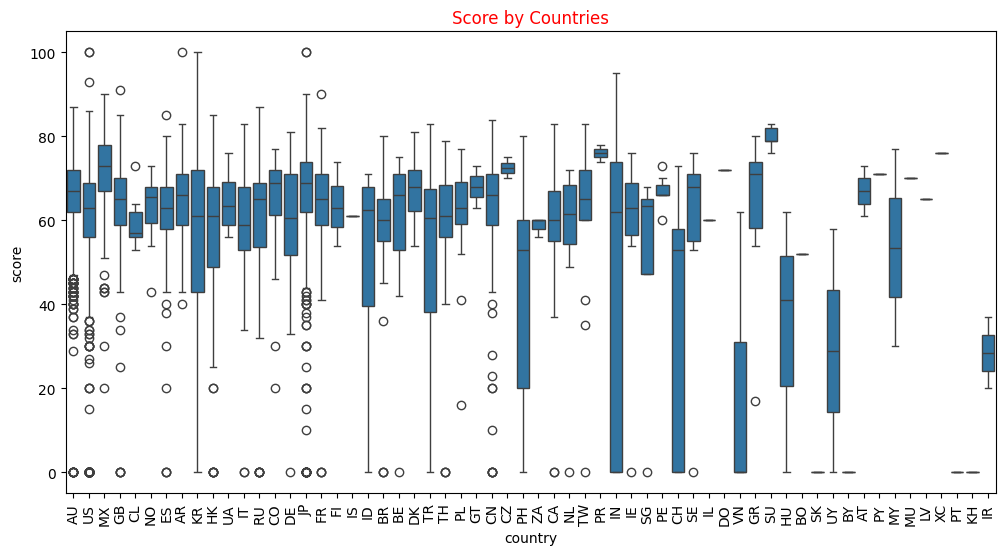

In [51]:
# score vary by country ( using box plot)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
plt.title("Score by Countries", color = 'r')
sns.boxplot(x = 'country', y = 'score', data = df)
plt.show()

In [54]:
df1 = df[['score','budget_x','revenue']]  #coorelation between score,budget and revenue
c = df1.corr()

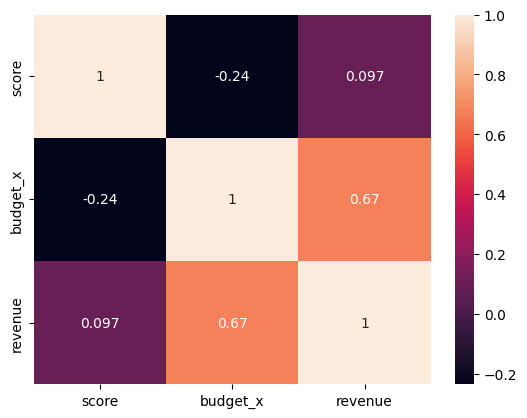

In [55]:
sns.heatmap(c, annot = True)
plt.show()

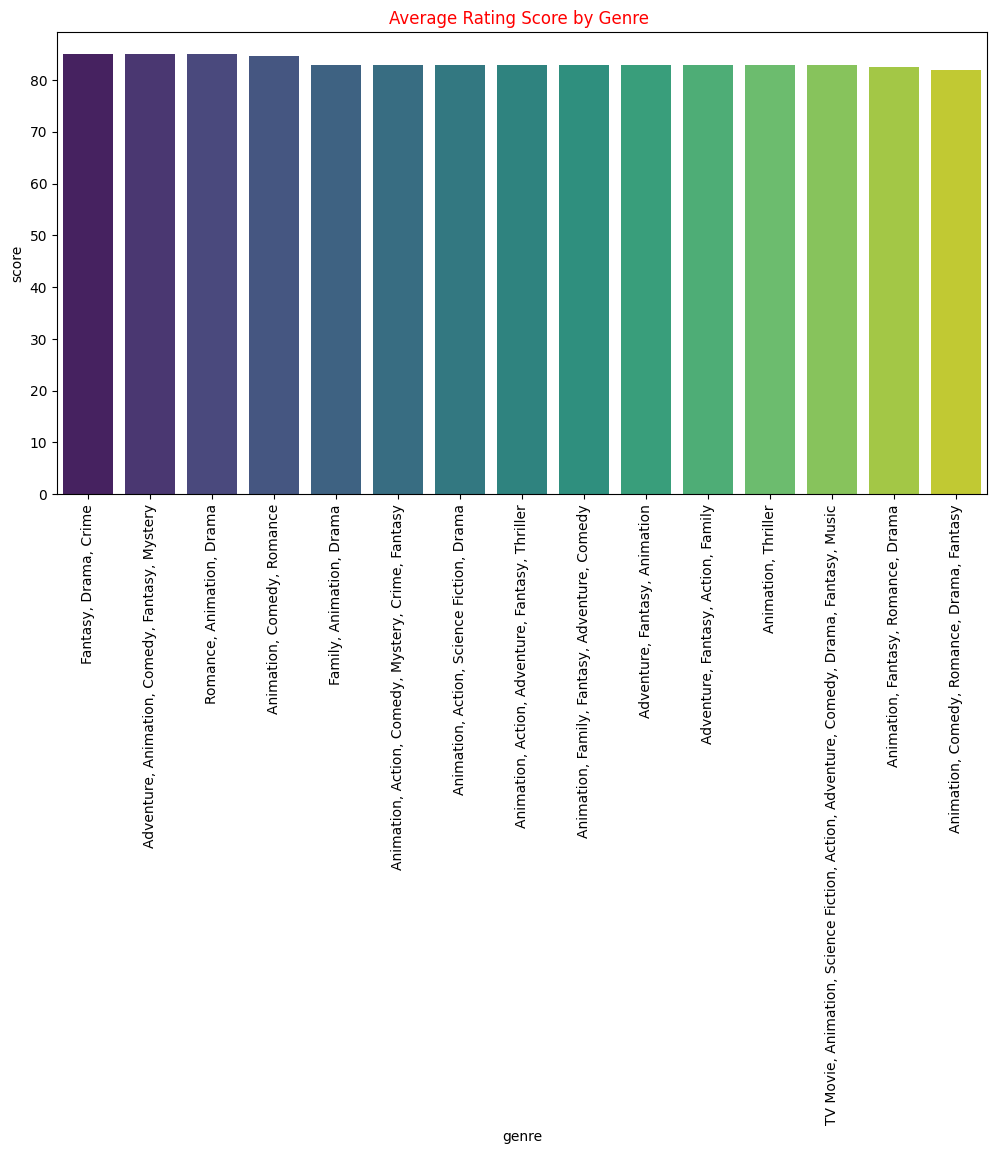

In [58]:
#Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.
gb = df.groupby('genre').agg({"score":"mean"})
gb = gb.sort_values(by = "score", ascending = False)
gb = gb.head(15)
gb
plt.figure(figsize =(12,6))
sns.barplot(x = gb.index, y = gb['score'], data = gb, hue = gb.index, palette = 'viridis')
plt.title("Average Rating Score by Genre ",color = "r")
plt.xticks(rotation = 90)
plt.show()

In [57]:
df['year'] = df['date_x'].dt.year   # converted year column from object type to int
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


In [59]:
# movies released per year by genre
gb = df.groupby(['year','genre']).agg({'date_x':'count'})
gb

date_x
year genre                                 
1903 Drama, History                       1
1907 Adventure, Science Fiction           1
1915 Drama, History, War                  2
1920 Drama, Horror, Thriller, Crime       1
1923 Comedy, Romance, Thriller            1
...                                     ...
2023 War, Drama, History                  1
     War, History, Drama                  1
     Western                              1
     Western, Action                      1
     unavailable                         24

[6438 rows x 1 columns]

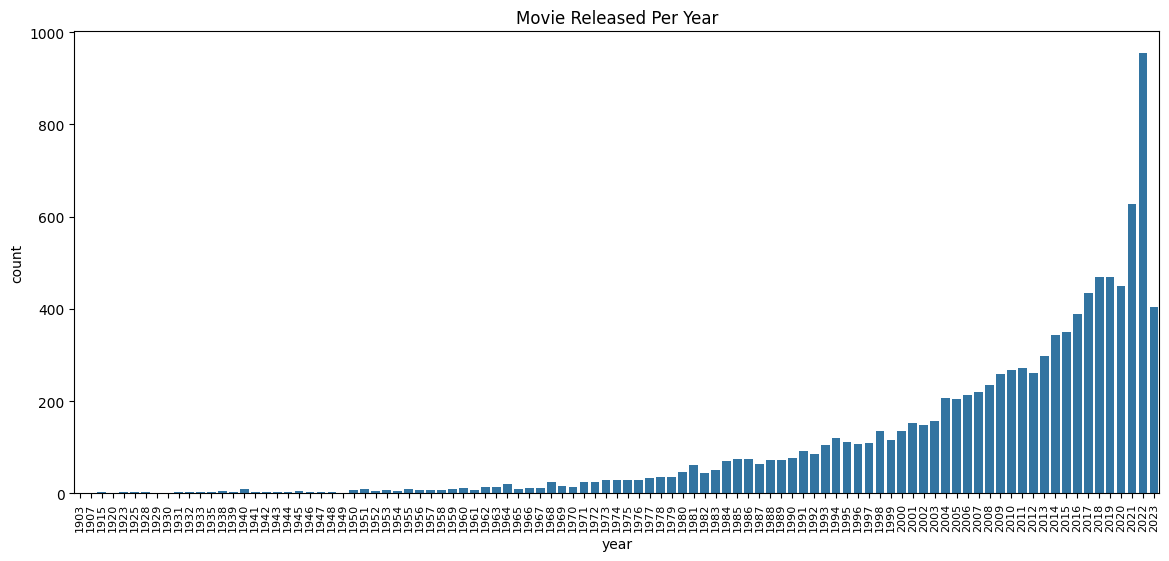

In [60]:
#ploted the movie release per year using countplot
plt.figure(figsize = (14,6))
plt.xticks(rotation = 90, fontsize = 8)
plt.title("Movie Released Per Year")
sns.countplot(x = 'year', data = df)
plt.show()

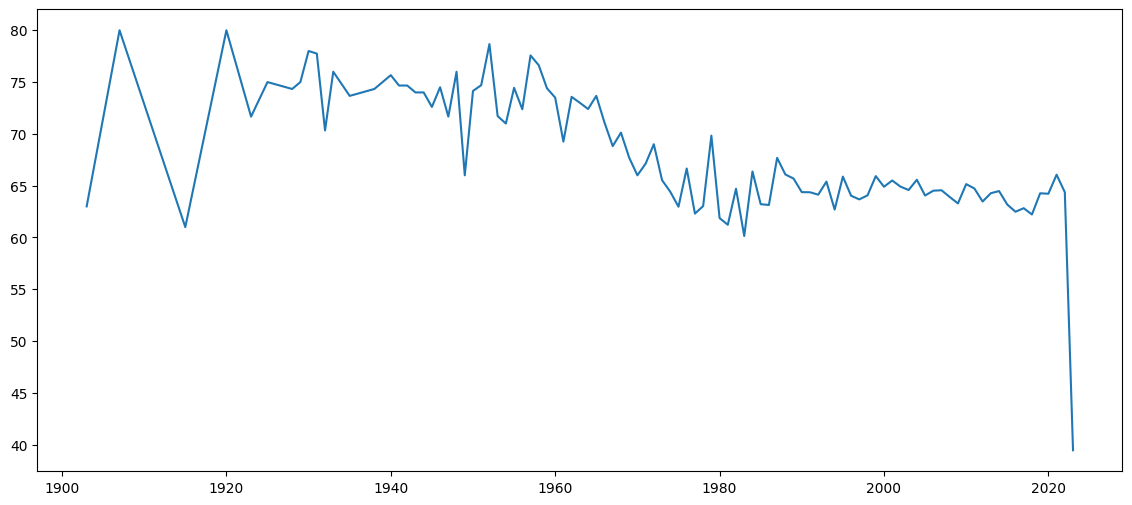

In [61]:
# average movie score changed over the years
plt.figure(figsize = (14,6))
gb = df.groupby('year').agg({'score':'mean'})
plt.plot(gb.index, 'score', data = gb)
plt.show()

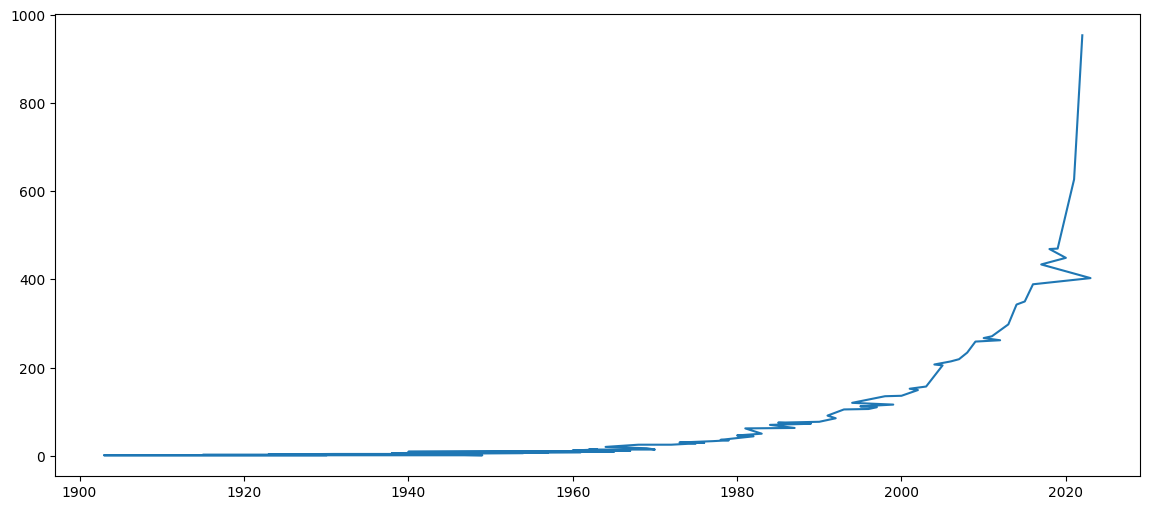

In [63]:
# plot the number of movies released each year
gb = df.groupby('year').agg({'names':'count'})
gb = gb.sort_values(by = 'names', ascending = False)
gb
plt.figure(figsize = (14,6))
plt.plot(gb.index, 'names', data = gb)
plt.show()

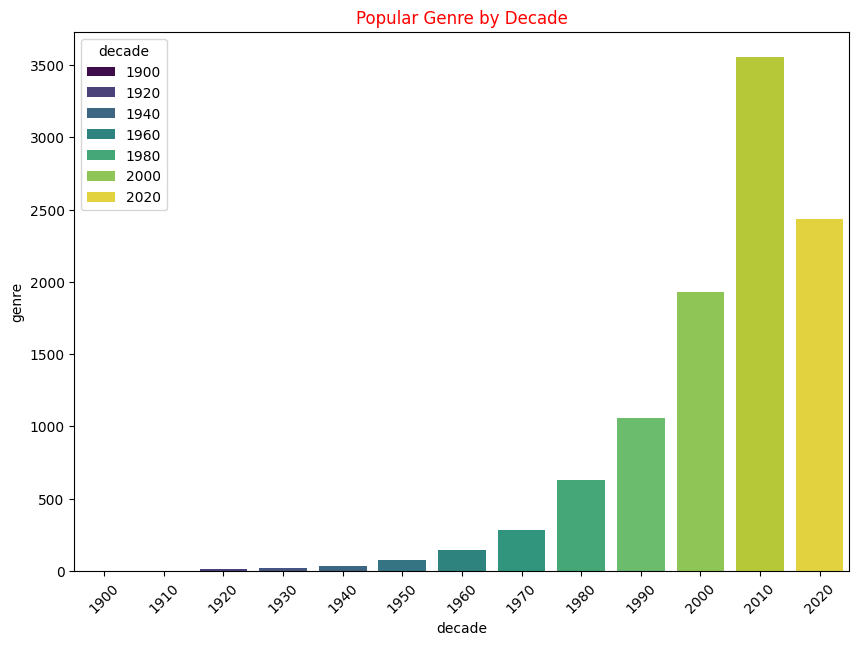

In [67]:
# which genres are most popular in each decade
df['decade'] = (df['year']//10)*10
gb = df.groupby('decade').agg({'genre':'count'})
gb
plt.figure(figsize = (10,7))
plt.title("Popular Genre by Decade",color = 'r')
plt.xticks(rotation = 45)
sns.barplot(x = gb.index, y = gb['genre'], data = gb, hue = gb.index, palette = 'viridis')

plt.show()